In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import random

In [20]:
file_path = "soc-Slashdot0902.txt"
subset_percentage = 0.005
data = []

In [21]:
with open(file_path, 'r') as f:
    # Skip the first 4 lines (header)
    for _ in range(4):
        next(f)

    # Read and process lines, selecting a percentage randomly
    for line in f:
        if random.random() < subset_percentage:
            source, target = map(int, line.strip().split("\t"))
            data.append({"FromNodeId": source, "ToNodeId": target})

## Preprocessing and creation of a NetworkX directed graph

In [22]:
# Convert the list of dictionaries to a pandas DataFrame
data = pd.DataFrame(data)

# Display the first few rows
print(data.head())

   FromNodeId  ToNodeId
0           0        86
1           4       446
2           4      4949
3           7      5101
4           8       643


In [23]:
# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(data, source="FromNodeId", target="ToNodeId", create_using=nx.DiGraph())

## Some Exploratory Data Analysis (EDA) on the graph

In [24]:
# Basic EDA
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 6500
Number of edges: 4829


In [25]:
# Degree distributions
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

In [26]:
print(f"Average in-degree: {np.mean(in_degrees):.2f}")
print(f"Average out-degree: {np.mean(out_degrees):.2f}")

Average in-degree: 0.74
Average out-degree: 0.74


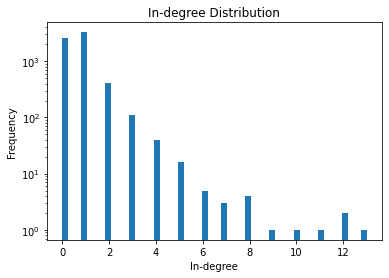

In [27]:
# Plot degree distributions
plt.hist(in_degrees, bins=50, log=True)
plt.title("In-degree Distribution")
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.savefig("in_degree_distribution.png", dpi=300,bbox_inches='tight')
plt.show()

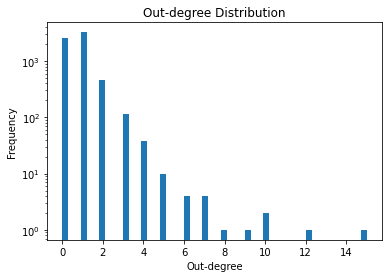

In [28]:
plt.hist(out_degrees, bins=50, log=True)
plt.title("Out-degree Distribution")
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.savefig('out_degree_distribution.png', dpi=300,bbox_inches='tight')
plt.show()

## Detection of communities using the Louvain method

In [29]:
import community as community_louvain
from community import best_partition

In [30]:
undirected_G = G.to_undirected()
partition = community_louvain.best_partition(undirected_G)

In [31]:
# Add community labels as node attributes
nx.set_node_attributes(G, partition, "community")

# Computing centrality measures for the nodes in the graph

In [32]:
degree_centrality = nx.degree_centrality(G)

Disclaimer: the following block of code could get compute intensive, execute with vaution

In [33]:
#betweenness_centrality = nx.betweenness_centrality(G)

In [34]:
#closeness_centrality = nx.closeness_centrality(G)

In [35]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [36]:
# Add centrality measures as node attributes
nx.set_node_attributes(G, degree_centrality, "degree_centrality")
# nx.set_node_attributes(G, betweenness_centrality, "betweenness_centrality")
# nx.set_node_attributes(G, closeness_centrality, "closeness_centrality")
nx.set_node_attributes(G, eigenvector_centrality, "eigenvector_centrality")

In [37]:
# Visualize the graph
pos = nx.spring_layout(G, seed=42)
node_color = [partition[node] for node in G.nodes()]


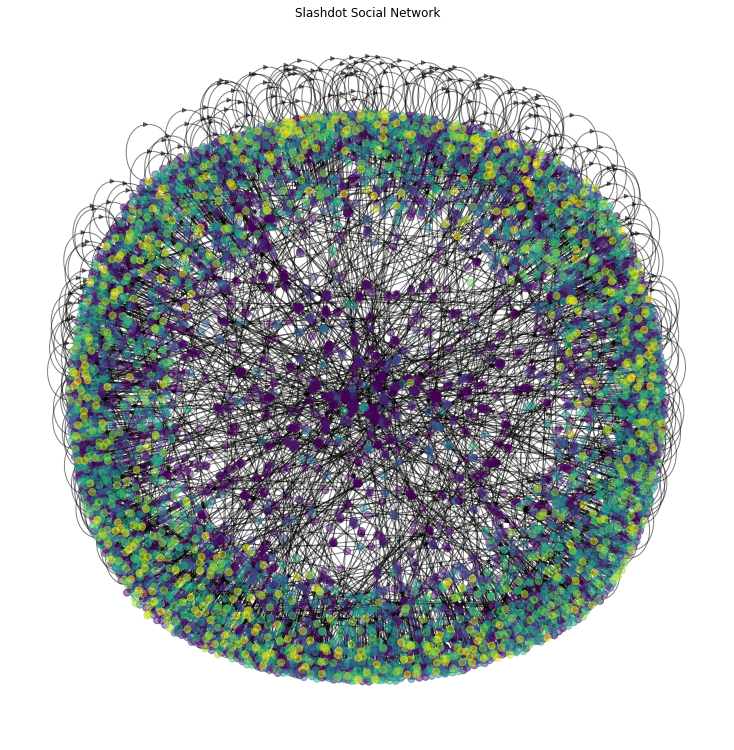

In [38]:

plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=50, node_color=node_color, with_labels=False, alpha=0.5)
plt.title("Slashdot Social Network")
plt.show()
